Connect with me on Linkedin: https://www.linkedin.com/in/shubhankar-barman-12585091/

**Problem Statement**

Scrape all job postings by area from the links given in the file ‘link_by_areas.csv’. For every link, loop through all the job postings by page, collecting all the information for a given posting. 

Create an output CSV file with job title, company, experience, salary, location, description, tags associated, function area, posting date, scraping date. 

#**Solution**

The task at hand is to build a Python Auto Scraper tool that will scrape data from Naukri job site and save the output as a CSV file which can be used for further analysis.


In order to accomplish this task. I will be using ***Python*** to scrape the required data from the job search site-***Naukri***.

To begin with, the necessary libraries needs to be imported.

**WebDriver**: drives a browser natively, as a user would, either locally or on a remote machine using the Selenium server, marks a leap forward in terms of browser automation.

**Selenium WebDriver**: refers to both the language bindings and the implementations of the individual browser controlling code. This is commonly referred to as just WebDriver.

**Beautiful Soup**: is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

**Pandas**: is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. Used for dataframe manupulations.

In [1]:
!pip install selenium
!pip install msedge-selenium-tools
!pip install bs4
!pip install chromedriver_binary
!pip install yarl

In [2]:
#importing the libraries
from selenium import webdriver
import chromedriver_binary
from bs4 import BeautifulSoup
import time
import pandas as pd

In [3]:
#loading the link_by_areas.csv file
joblist = pd.read_csv('link_by_areas.csv')
joblist.head()

,type,link
0,Accounting Jobs,https://www.naukri.com/accounting-jobs?xt=cats...
1,Interior Design Jobs,https://www.naukri.com/interior-design-jobs?xt...
2,Bank Jobs,https://www.naukri.com/bank-jobs?xt=catsrch&qf...
3,Content Writing Jobs,https://www.naukri.com/content-writing-jobs?xt...
4,Consultant Jobs,https://www.naukri.com/consultant-jobs?xt=cats...


**URL STRUCTURE** 

In order to scrape data from one page to the other, the urls need to be created in such a way that it will automatically adjust to move move from one page to the other.

When we look closely at the **urls**, we can see that all theurls have the domain **https://www.naukri.com/** followed by the job type, then the **page number** and a question mark as shown below. We will need to find a way to make the page number generic in order to be able to navigate through different pages automatically.

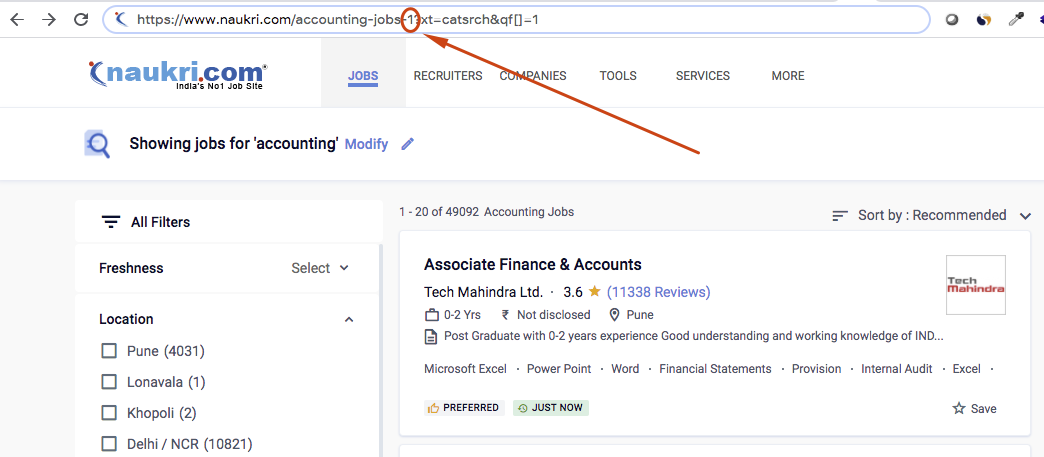

<br>

Lert's first convert our **urls** to a list

In [4]:
urls = joblist['link'].tolist()

In [5]:
urls

['https://www.naukri.com/accounting-jobs?xt=catsrch&qf[]=1',
 'https://www.naukri.com/interior-design-jobs?xt=catsrch&qf[]=2',
 'https://www.naukri.com/bank-jobs?xt=catsrch&qf[]=6',
 'https://www.naukri.com/content-writing-jobs?xt=catsrch&qf[]=5',
 'https://www.naukri.com/consultant-jobs?xt=catsrch&qf[]=9',
 'https://www.naukri.com/engineering-jobs?xt=catsrch&qf[]=21',
 'https://www.naukri.com/export-import-jobs?xt=catsrch&qf[]=10',
 'https://www.naukri.com/merchandiser-jobs?xt=catsrch&qf[]=10',
 'https://www.naukri.com/security-jobs?xt=catsrch&qf[]=45',
 'https://www.naukri.com/hr-jobs?xt=catsrch&qf[]=12',
 'https://www.naukri.com/hotel-jobs?xt=catsrch&qf[]=4',
 'https://www.naukri.com/application-programming-jobs?xt=catsrch&qf[]=24.01',
 'https://www.naukri.com/client-server-jobs?xt=catsrch&qf[]=24.02',
 'https://www.naukri.com/dba-jobs?xt=catsrch&qf[]=24.03',
 'https://www.naukri.com/ecommerce-jobs?xt=catsrch&qf[]=24.12',
 'https://www.naukri.com/erp-jobs?xt=catsrch&qf[]=24.04',
 'h

<br>


In order to make the **urls** generic. We will need use a library called **Yarl**(Yet another URL library). All url parts: scheme, user, password, host, port, path, query and fragment are accessible by yarl properties.

We will use **yarl** to access different parts of the variuos **urls**.



In [6]:
import yarl 
from yarl import URL  #importing the yarl library 
n = [] #an empty set that will contain the job type of the url
for i in urls:
    n.append(URL(i).path) #getting the job type part of the url using yarl property: path

In [7]:
#let's see what is contain in 'n'
n

['/accounting-jobs',
 '/interior-design-jobs',
 '/bank-jobs',
 '/content-writing-jobs',
 '/consultant-jobs',
 '/engineering-jobs',
 '/export-import-jobs',
 '/merchandiser-jobs',
 '/security-jobs',
 '/hr-jobs',
 '/hotel-jobs',
 '/application-programming-jobs',
 '/client-server-jobs',
 '/dba-jobs',
 '/ecommerce-jobs',
 '/erp-jobs',
 '/vlsi-jobs',
 '/mainframe-jobs',
 '/middleware-jobs',
 '/mobile-jobs',
 '/network-administrator-jobs',
 '/information-technology-jobs',
 '/testing-jobs',
 '/system-programming-jobs',
 '/edp-jobs',
 '/telecom-software-jobs',
 '/telecom-jobs',
 '/bpo-jobs',
 '/legal-jobs',
 '/marketing-jobs',
 '/packaging-jobs',
 '/pharma-jobs',
 '/maintenance-jobs',
 '/logistics-jobs',
 '/sales-jobs',
 '/secretary-jobs',
 '/corporate-planning-jobs',
 '/site-engineering-jobs',
 '/film-jobs',
 '/teaching-jobs',
 '/airline-jobs',
 '/graphic-designer-jobs',
 '/shipping-jobs',
 '/analytics-jobs',
 '/business-intelligence-jobs']

In [8]:
m = [] #an empty list that will contain the rest of the url after the job part
for i in urls:
    m.append(URL(i).query_string)  #getting the rest of the url using yarl property: query_string
#     print(m)

In [9]:
#let's see what is contain in 'm'
m

['xt=catsrch&qf[]=1',
 'xt=catsrch&qf[]=2',
 'xt=catsrch&qf[]=6',
 'xt=catsrch&qf[]=5',
 'xt=catsrch&qf[]=9',
 'xt=catsrch&qf[]=21',
 'xt=catsrch&qf[]=10',
 'xt=catsrch&qf[]=10',
 'xt=catsrch&qf[]=45',
 'xt=catsrch&qf[]=12',
 'xt=catsrch&qf[]=4',
 'xt=catsrch&qf[]=24.01',
 'xt=catsrch&qf[]=24.02',
 'xt=catsrch&qf[]=24.03',
 'xt=catsrch&qf[]=24.12',
 'xt=catsrch&qf[]=24.04',
 'xt=catsrch&qf[]=24.05',
 'xt=catsrch&qf[]=24.13',
 'xt=catsrch&qf[]=24.15',
 'xt=catsrch&qf[]=24.14',
 'xt=catsrch&qf[]=24.06',
 'xt=catsrch&qf[]=24',
 'xt=catsrch&qf[]=24.08',
 'xt=catsrch&qf[]=24.09',
 'xt=catsrch&qf[]=24.11',
 'xt=catsrch&qf[]=24.10',
 'xt=catsrch&qf[]=37',
 'xt=catsrch&qf[]=8',
 'xt=catsrch&qf[]=13',
 'xt=catsrch&qf[]=15',
 'xt=catsrch&qf[]=18',
 'xt=catsrch&qf[]=16',
 'xt=catsrch&qf[]=19',
 'xt=catsrch&qf[]=14',
 'xt=catsrch&qf[]=22',
 'xt=catsrch&qf[]=11',
 'xt=catsrch&qf[]=7',
 'xt=catsrch&qf[]=20',
 'xt=catsrch&qf[]=43',
 'xt=catsrch&qf[]=36',
 'xt=catsrch&qf[]=44',
 'xt=catsrch&qf[]=3',
 

<br>

Now that we have been able to extract the variuos parts of the **urls**, we will sticth them together but this time we will add a placeholder **-{}** after the ***job type part*** of the url.

In [10]:
generic_urls= []
for i in range(len(n)):
    
    url = 'https://www.naukri.com/'+n[i]+'-{}?'+m[i] #adding the domain of the url, the job part, the placeholder {} , as well as the rest of the url together
    generic_urls.append(url) #appending our generic url into a list

As seen below, all good. we have the our urls with a placeholder **{}** where we can simply be adding our page numbers to navigate to different pages as we scrape our data.

In [11]:
generic_urls

['https://www.naukri.com//accounting-jobs-{}?xt=catsrch&qf[]=1',
 'https://www.naukri.com//interior-design-jobs-{}?xt=catsrch&qf[]=2',
 'https://www.naukri.com//bank-jobs-{}?xt=catsrch&qf[]=6',
 'https://www.naukri.com//content-writing-jobs-{}?xt=catsrch&qf[]=5',
 'https://www.naukri.com//consultant-jobs-{}?xt=catsrch&qf[]=9',
 'https://www.naukri.com//engineering-jobs-{}?xt=catsrch&qf[]=21',
 'https://www.naukri.com//export-import-jobs-{}?xt=catsrch&qf[]=10',
 'https://www.naukri.com//merchandiser-jobs-{}?xt=catsrch&qf[]=10',
 'https://www.naukri.com//security-jobs-{}?xt=catsrch&qf[]=45',
 'https://www.naukri.com//hr-jobs-{}?xt=catsrch&qf[]=12',
 'https://www.naukri.com//hotel-jobs-{}?xt=catsrch&qf[]=4',
 'https://www.naukri.com//application-programming-jobs-{}?xt=catsrch&qf[]=24.01',
 'https://www.naukri.com//client-server-jobs-{}?xt=catsrch&qf[]=24.02',
 'https://www.naukri.com//dba-jobs-{}?xt=catsrch&qf[]=24.03',
 'https://www.naukri.com//ecommerce-jobs-{}?xt=catsrch&qf[]=24.12',
 

Confirming below to see if we still have same number of urls as given in original dataset.

In [12]:
joblist.shape

(45, 2)

In [13]:
len(generic_urls)

45

#**Scraping Data From Naukri.Com**

In order to scrape the required data from naukri.com, we will follow a simple two step process:



1.   Define a dataframe which will contain our data
2.   Create a generic python code which will help to extract the data as required.



<br>


**Create a dataframe to contain our scraped data**

In [14]:
df = pd.DataFrame(columns=['Job_Title','Experience','Company','Scraping_Date','Salary','Location','Tags_Associated','Posting_Date'])


**Create a generic python code to scrape the required data**

In [15]:
page_number = int(input("Please Enter how many pages you want to scrap? "))

Please Enter how many pages you want to scrap? 1


In [17]:
for page in range(1,page_number+1):
    print("Page: ", page,"\n\n")
    print("**********************************************")
    for urll in generic_urls:
        url = urll.format(page)
        driver = webdriver.Chrome('/Users/Shubhankar/Downloads/chromedriver_win32/chromedriver.exe') #provide the downloaded chromedriver path
        driver.get(url)
        print(url)
        time.sleep(10)

        soup = BeautifulSoup(driver.page_source,'html5lib')
        
        driver.close()
        
        


#         print(soup.prettify())
        results = soup.find(class_='list')
        job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')

        
        for job_elem in job_elems:
            
            #job title
            Job_Title = job_elem.find('a',class_='title fw500 ellipsis')
            print(Job_Title.text)
            print("--------------------------------------------------")
        
            # Experience
            Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
            
            if Exp:
                Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
                if Exp_span:
                    Experience = Exp_span.text
                else:
                    continue
            else:
                continue
            print(Experience)
            
            print("--------------------------------------------------")
            
            # Company
            Company = job_elem.find('a',class_='subTitle ellipsis fleft')
            print(Company.text)

            print("--------------------------------------------------")            
            # Date Scraped
            from datetime import date
            today = date.today() # dd/mm/YY
            date_today = today.strftime("%d/%m/%Y")
            print(date_today)
            
            print("--------------------------------------------------")
            # Salary
            Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
            Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
            if Sal_span is None:
                continue
            else:
                Salary = Sal_span.text
                print(Salary)
            print("--------------------------------------------------")
            
            # Location for the job post
            Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
            Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
            if Loc_exp is None:
                continue
            else:
                Location = Loc_exp.text
                print(Location)
            
            print("--------------------------------------------------")            
            
            #tags
     
            tags = job_elem.find('li',class_='fleft fs12 grey-text lh16 dot')

            if tags is None:
                continue
            else:
                assoc_tags = tags.text
                print(assoc_tags)

            print("--------------------------------------------------")            
            
            
            # Date job Posted
            date = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
            date_posted = date.find('span',class_='fleft fw500')
            if date_posted is None:
                continue
            else:
                Posting_Date = date_posted.text
                print(Posting_Date)
            print("--------------------------------------------------")
            
            df=df.append({'Job_Title':Job_Title.text,'Experience':Experience,'Company':Company.text,'Scraping_Date':date_today, 'Salary':Salary,'Location':Location,'Tags_Associated':assoc_tags,'Posting_Date':Posting_Date},ignore_index = True)
                  
        

Page:  1 


**********************************************
https://www.naukri.com//accounting-jobs-1?xt=catsrch&qf[]=1
Accounts Executive/ Senior Associate For UK Accounting process Thane.
--------------------------------------------------
1-5 Yrs
--------------------------------------------------
Anderson Business Solutions
--------------------------------------------------
09/09/2022
--------------------------------------------------
2,75,000 - 4,50,000 PA.
--------------------------------------------------
Thane, Navi Mumbai, Mumbai (All Areas)(Ghodbunder Road)
--------------------------------------------------
Accounting
--------------------------------------------------
1 Day Ago
--------------------------------------------------
Associate/ Senior Associate  in UK Accounts/ Thane
--------------------------------------------------
1-4 Yrs
--------------------------------------------------
Anderson Business Solutions
--------------------------------------------------
09/09/2022
----

#Let's observe the data we have scraped and saved in our pandas dataframe

In [18]:
df.head(20)

,Job_Title,Experience,Company,Scraping_Date,Salary,Location,Tags_Associated,Posting_Date
0,Accounts Executive/ Senior Associate For UK Ac...,1-5 Yrs,Anderson Business Solutions,09/09/2022,"2,75,000 - 4,50,000 PA.","Thane, Navi Mumbai, Mumbai (All Areas)(Ghodbun...",Accounting,1 Day Ago
1,Associate/ Senior Associate in UK Accounts/ T...,1-4 Yrs,Anderson Business Solutions,09/09/2022,"2,25,000 - 4,50,000 PA.","Thane, Navi Mumbai, Mumbai (All Areas)(Ghodbun...",Accounting,1 Day Ago
2,Executive/ Senior Accounts Executive/ Assistan...,0-4 Yrs,Mewar Hospital,09/09/2022,"3,00,000 - 5,50,000 PA.",Udaipur,accounting,2 Days Ago
3,Senior audit manager/Accounts manager/Accounts...,0-5 Yrs,Manohar Chowdhry and Associates,09/09/2022,"1,00,000 - 5,00,000 PA.",Madurai,Accounts Finalisation,7 Days Ago
4,"CA, Accounts Manager, Accounts Executive",0-5 Yrs,ANKUSH AGGARWAL & CO (Chartered Accountants),09/09/2022,Not disclosed,"Ghaziabad(Vaishali +1), Delhi / NCR(Anand Vihar)",Chartered Accountant,2 Days Ago
5,Account Manager - Retail,0-2 Yrs,Swiggy,09/09/2022,Not disclosed,"Hyderabad/Secunderabad, Chennai",Business Development,2 Days Ago
6,Hiring Fresher - Accounts Executive (US Payroll),0-2 Yrs,SVK Global Solutions,09/09/2022,"50,000 - 3,00,000 PA.",Hyderabad/Secunderabad(Madhapur),us payroll,1 Day Ago
7,Job opportunity For the role of Senior Executi...,0-2 Yrs,Encube Ethicals,09/09/2022,Not disclosed,Mumbai,chartered accountant,2 Days Ago
8,Account Executive,0-5 Yrs,M/S VASTRAA FUSION ENTERPRISES,09/09/2022,"2,25,000 - 3,50,000 PA.",Delhi / NCR,Tally Accounting,5 Days Ago
9,Accounts executive-MBA Fresher,0-1 Yrs,Shahi,09/09/2022,Not disclosed,Faridabad,Finance,6 Days Ago


###**Saving the scraped data into a csv file**

In [19]:
df.to_csv('NaukriJobScrapedData.csv')